In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm
import vegas

a0  = 1.26
aUV = 0.23
aIR = 0.0023
lUV = 106.6
lIR = 908.3
lSc = 128
alpha = 1./137.

# l = wavelength in nm
def n(l):
    #print(l,a0 + aUV*l**2 / (l**2 - lUV**2) + aIR*l**2 / (l**2 - lIR**2))
    return np.sqrt(a0 + aUV*l**2 / (l**2 - lUV**2) + aIR*l**2 / (l**2 - lIR**2))

def dNdXdl(l,beta=1):
    #print(l,(1 - 1/(n(l)*beta)**2) * l**-2)
    return 2*np.pi*alpha * (1 - 1/(n(l)*beta)**2) * l**-2 * 1e7

/home/nwkamp/anaconda3/lib/python3.8/site-packages/scipy/__init__.py:138: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.1)
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion} is required for this version of "


In [2]:
N = 100
lower_bound_range = np.linspace(150,650,N)
dNdX_range = []
for lb in lower_bound_range:
    integ = vegas.Integrator([[lb,700]])
    result = integ(dNdXdl,nitn=10,neval=50)
    dNdX_range.append(result[0].mean)
    

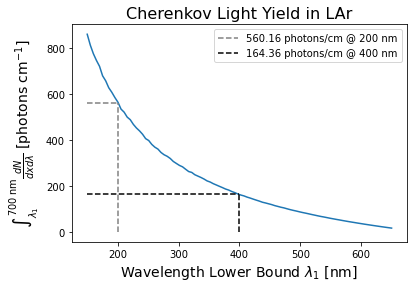

In [3]:
plt.plot(lower_bound_range,dNdX_range)


light_yield_at_200 = (vegas.Integrator([[200,700]]))(dNdXdl,nitn=10,neval=50)[0].mean
light_yield_at_400 = (vegas.Integrator([[400,700]]))(dNdXdl,nitn=10,neval=50)[0].mean

plt.plot([150,200],[light_yield_at_200,light_yield_at_200],color='grey',ls='--')
plt.plot([200,200],[0,light_yield_at_200],color='grey',ls='--',label='%2.2f photons/cm @ 200 nm'%light_yield_at_200)

plt.plot([150,400],[light_yield_at_400,light_yield_at_400],color='black',ls='--')
plt.plot([400,400],[0,light_yield_at_400],color='black',ls='--',label='%2.2f photons/cm @ 400 nm'%light_yield_at_400)

plt.legend()
plt.title('Cherenkov Light Yield in LAr',fontsize=16)
plt.xlabel(r'Wavelength Lower Bound $\lambda_1$ [nm]',fontsize=14)
plt.ylabel(r'$\int_{\lambda_1}^{700\;{\rm nm}} \frac{dN}{dx d\lambda}$ [photons cm$^{-1}$]',fontsize=14)
plt.show()



# Total light yield

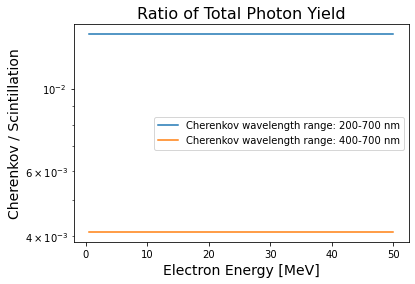

In [9]:
PhotonsPerMeV_scint = 2e4
dEdX_MIP = 2 # MeV / cm

electron_energy_range = np.logspace(np.log10(0.5),np.log10(50),N) #MeV
photons_scint = PhotonsPerMeV_scint * electron_energy_range
photons_cherenkov_200 = light_yield_at_200 * electron_energy_range / dEdX_MIP 
photons_cherenkov_400 = light_yield_at_400 * electron_energy_range / dEdX_MIP 
    

plt.plot(electron_energy_range,photons_cherenkov_200/photons_scint,label='Cherenkov wavelength range: 200-700 nm')
plt.plot(electron_energy_range,photons_cherenkov_400/photons_scint,label='Cherenkov wavelength range: 400-700 nm')
plt.semilogy()
plt.legend()
plt.title('Ratio of Total Photon Yield',fontsize=16)
plt.xlabel('Electron Energy [MeV]',fontsize=14)
plt.ylabel('Cherenkov / Scintillation',fontsize=14)
plt.show()

# Prompt light yield
(Use https://arxiv.org/abs/2001.09855)

In [10]:
Rs = 0.23
Rt = 0.71
Ts = 8.2 # ns
Tt = 1445 # ns
Trec = 75.5
c = 3e8*1e2*1e-9 # cm/ns

# t in ns
def scint_time_profile(t):
    singlet = Rs/Ts * np.exp(-t/Ts)
    triplet = Rt/Tt * np.exp(-t/Tt)
    rec = (1 - Rs - Rt) / (1 + t/Trec)**2 * 1/Trec
    return singlet + triplet + rec

prompt_scint_frac = (vegas.Integrator([[0,2]]))(scint_time_profile,nitn=10,neval=50)[0].mean

[0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021
 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021
 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021
 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021
 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021
 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021
 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021
 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021
 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021
 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021
 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021
 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021
 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021
 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021
 0.07856021 0.07856021 0.07856021 0.07856021 0.07856021 0.0785

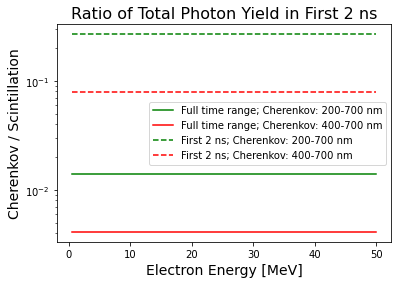

In [11]:
photons_scint_prompt = prompt_scint_frac * photons_scint
plt.plot(electron_energy_range,photons_cherenkov_200/photons_scint,label='Full time range; Cherenkov: 200-700 nm',color='g')
plt.plot(electron_energy_range,photons_cherenkov_400/photons_scint,label='Full time range; Cherenkov: 400-700 nm',color='r')
plt.plot(electron_energy_range,photons_cherenkov_200/photons_scint_prompt,label='First 2 ns; Cherenkov: 200-700 nm',ls='--',color='g')
plt.plot(electron_energy_range,photons_cherenkov_400/photons_scint_prompt,label='First 2 ns; Cherenkov: 400-700 nm',ls='--',color='r')
print(photons_cherenkov_400/photons_scint_prompt)
plt.semilogy()
plt.legend()
plt.title('Ratio of Total Photon Yield in First 2 ns',fontsize=16)
plt.xlabel('Electron Energy [MeV]',fontsize=14)
plt.ylabel('Cherenkov / Scintillation',fontsize=14)
plt.show()

# Directionality 

<ipython-input-17-261697fb02f8>:3: RuntimeWarning: invalid value encountered in sqrt
  beta_range = (1-gamma_range**-2)**(0.5)
<ipython-input-1-b0d8044a7988>:17: RuntimeWarning: invalid value encountered in sqrt
  return np.sqrt(a0 + aUV*l**2 / (l**2 - lUV**2) + aIR*l**2 / (l**2 - lIR**2))
<ipython-input-17-261697fb02f8>:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(electron_energy_range,wavelength_range,costheta,norm=LogNorm())


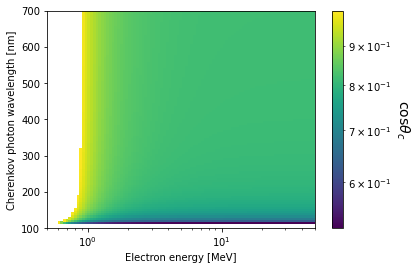

<ipython-input-17-261697fb02f8>:15: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolor(electron_energy_range,wavelength_range,CCMwallRadius,norm=LogNorm())


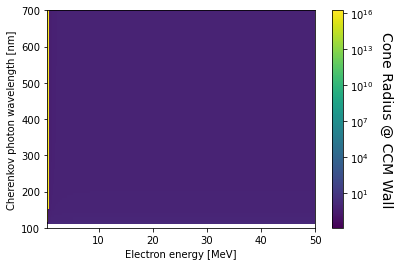

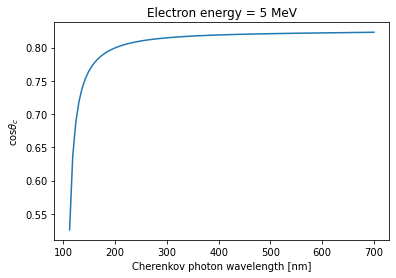

In [17]:
wavelength_range = np.linspace(100,700,N)
gamma_range = electron_energy_range/0.511
beta_range = (1-gamma_range**-2)**(0.5)
costheta = (np.outer(n(wavelength_range),beta_range))**(-1)
costheta = np.where(costheta>1,0,costheta)
plt.pcolor(electron_energy_range,wavelength_range,costheta,norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label(r'$\cos \theta_c$', rotation=270,fontsize=14,labelpad=20)
plt.semilogx()
plt.xlabel('Electron energy [MeV]')
plt.ylabel('Cherenkov photon wavelength [nm]')
plt.show()

CCMwallRadius = np.tan(np.arccos(costheta))
plt.pcolor(electron_energy_range,wavelength_range,CCMwallRadius,norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label('Cone Radius @ CCM Wall', rotation=270,fontsize=14,labelpad=20)
plt.xlabel('Electron energy [MeV]')
plt.ylabel('Cherenkov photon wavelength [nm]')
plt.show()

E = 5 #MeV
gamma = E/0.511
beta = (1-gamma**-2)**(0.5)
plt.plot(wavelength_range,(1/(n(wavelength_range)*beta)))
plt.title('Electron energy = 5 MeV')
plt.xlabel('Cherenkov photon wavelength [nm]')
plt.ylabel(r'$\cos \theta_c$')
plt.show()